# Chapter 1: Dynamics of Simple Maps
*Based on R. L. Devaney's overview*

## Summary

This chapter introduces the fundamental concepts of discrete dynamical systems through iteration of simple one-dimensional maps. Key topics include:

- **Iteration and orbits**: Repeatedly applying a function to generate sequences
- **Fixed points and periodic orbits**: Points that return to themselves
- **The quadratic family**: $f_c(x) = x^2 + c$ and its rich dynamics
- **Bifurcations**: Qualitative changes in dynamics as parameters vary
- **Period doubling route to chaos**: The cascade leading to chaotic behavior
- **Symbolic dynamics**: Encoding orbits with sequences of symbols

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
%matplotlib inline
plt.style.use('dark_background')

## 1.1 Orbit Diagram (Cobweb Plot)

Visualize iteration of $f(x) = rx(1-x)$ (logistic map) using a cobweb diagram.

In [2]:
def cobweb(r, x0, n_iter):
    """Generate cobweb plot for logistic map f(x) = rx(1-x)"""
    f = lambda x: r * x * (1 - x)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot f(x) and y=x
    x = np.linspace(0, 1, 500)
    ax.plot(x, f(x), 'cyan', lw=2, label=f'$f(x) = {r}x(1-x)$')
    ax.plot(x, x, 'white', lw=1, alpha=0.5, label='$y = x$')
    
    # Cobweb iteration
    xn = x0
    for _ in range(n_iter):
        xn1 = f(xn)
        ax.plot([xn, xn], [xn, xn1], 'yellow', lw=0.8, alpha=0.7)
        ax.plot([xn, xn1], [xn1, xn1], 'yellow', lw=0.8, alpha=0.7)
        xn = xn1
    
    ax.plot(x0, 0, 'ro', ms=8, label=f'$x_0 = {x0}$')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1}$')
    ax.legend()
    ax.set_title(f'Cobweb Plot: r = {r}')
    plt.show()

interact(cobweb,
         r=FloatSlider(min=0.5, max=4.0, step=0.01, value=2.5, description='r'),
         x0=FloatSlider(min=0.01, max=0.99, step=0.01, value=0.1, description='x₀'),
         n_iter=IntSlider(min=10, max=200, step=10, value=50, description='iterations'));

interactive(children=(FloatSlider(value=2.5, description='r', max=4.0, min=0.5, step=0.01), FloatSlider(value=…

## 1.2 Bifurcation Diagram

The bifurcation diagram shows how the long-term behavior of the logistic map changes with parameter $r$. Period-doubling bifurcations lead to chaos.

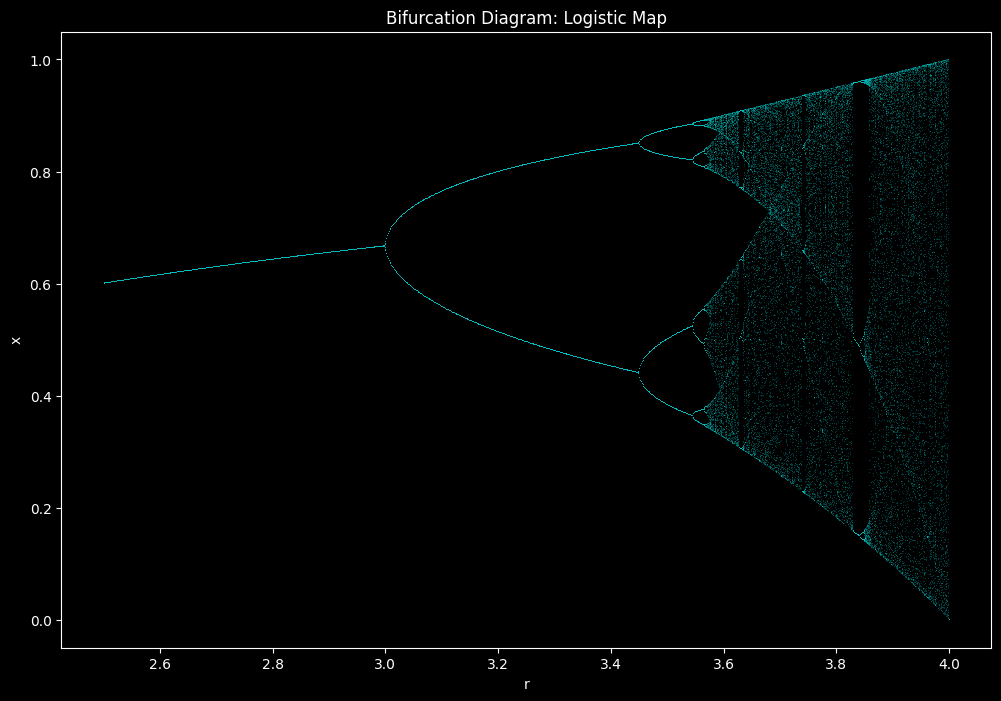

In [3]:
def bifurcation_diagram(r_min=2.5, r_max=4.0, resolution=1000):
    """Generate bifurcation diagram for logistic map"""
    r_values = np.linspace(r_min, r_max, resolution)
    iterations = 1000
    last = 100
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for r in r_values:
        x = 0.5
        for _ in range(iterations - last):
            x = r * x * (1 - x)
        
        xs = []
        for _ in range(last):
            x = r * x * (1 - x)
            xs.append(x)
        
        ax.plot([r] * last, xs, 'c,', alpha=0.3)
    
    ax.set_xlabel('r')
    ax.set_ylabel('x')
    ax.set_title('Bifurcation Diagram: Logistic Map')
    plt.show()

bifurcation_diagram()

## 1.3 Lyapunov Exponent

The Lyapunov exponent measures sensitivity to initial conditions. Positive values indicate chaos.

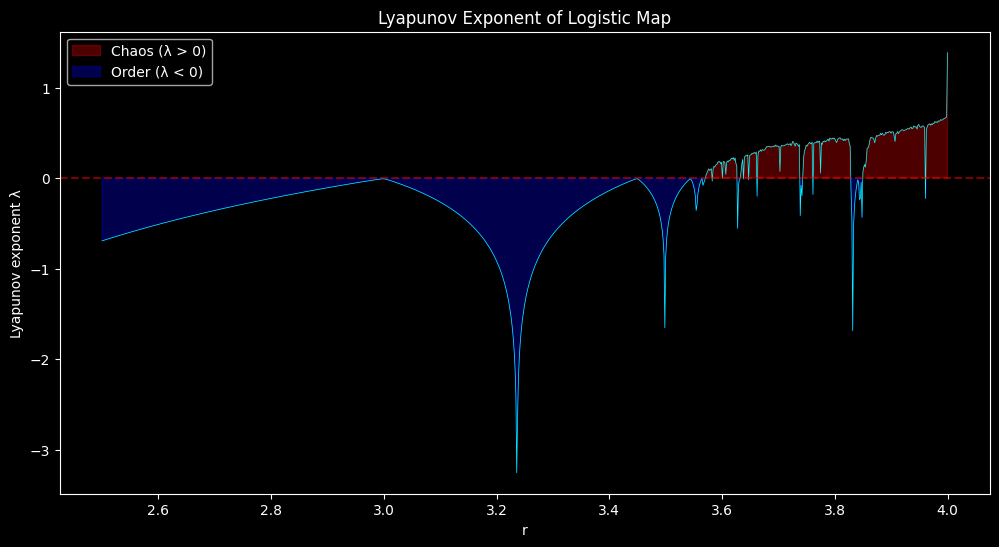

In [4]:
def lyapunov_exponent(r_min=2.5, r_max=4.0, resolution=1000):
    """Compute Lyapunov exponent for logistic map"""
    r_values = np.linspace(r_min, r_max, resolution)
    lyap = []
    
    for r in r_values:
        x = 0.5
        lyap_sum = 0
        n_iter = 1000
        
        for _ in range(n_iter):
            x = r * x * (1 - x)
            # Derivative of f(x) = rx(1-x) is r(1-2x)
            deriv = abs(r * (1 - 2*x))
            if deriv > 0:
                lyap_sum += np.log(deriv)
        
        lyap.append(lyap_sum / n_iter)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(r_values, lyap, 'cyan', lw=0.5)
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    ax.fill_between(r_values, lyap, 0, where=np.array(lyap) > 0, 
                    color='red', alpha=0.3, label='Chaos (λ > 0)')
    ax.fill_between(r_values, lyap, 0, where=np.array(lyap) < 0,
                    color='blue', alpha=0.3, label='Order (λ < 0)')
    ax.set_xlabel('r')
    ax.set_ylabel('Lyapunov exponent λ')
    ax.set_title('Lyapunov Exponent of Logistic Map')
    ax.legend()
    plt.show()

lyapunov_exponent()

## Notes

- **Feigenbaum constant**: The ratio of successive bifurcation intervals approaches δ ≈ 4.669 (universal for period-doubling maps)
- **Windows of periodicity**: Islands of stable periodic behavior exist within the chaotic regime
- **Sensitive dependence**: Hallmark of chaos — nearby orbits diverge exponentially